In [ ]:
import numpy as np
import tarfile
import os

import random
import matplotlib.pyplot as plt

## Extract files


In [13]:
# Define the extraction directory
extraction_dir = "../data/"
os.makedirs(extraction_dir, exist_ok=True)

# Define the path to the archive (located inside the extraction directory)
archive_path = os.path.join(extraction_dir, "MAE_dataset_subset.tar.gz")

# Open and extract the archive
with tarfile.open(archive_path, "r:gz") as tar:
    tar.extractall(path=extraction_dir)

print(f"Files extracted to: {extraction_dir}")

Files extracted to: ../data/


## Standardizing Image Sizes


In [ ]:

folder_path = os.path.join(extraction_dir, "MAE_dataset_subset")
files = [f for f in os.listdir(folder_path) if f.endswith('.npy')]
data = []
for file in files:
    file_path = os.path.join(folder_path, file)
    data.append(np.load(file_path))


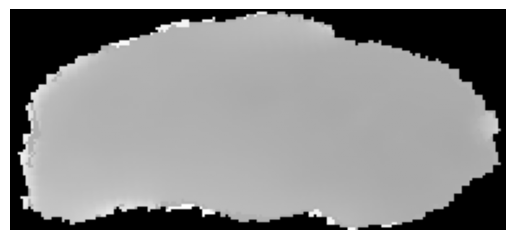

In [17]:

# Choose a random index
random_index = random.randint(0, len(data) - 1)
# Load the corresponding image
image = data[random_index]
# Display the image
plt.imshow(image, cmap='gray')
plt.axis('off')  # Turn off the axes
plt.show()

In [18]:
# chose a random sample from the data size 100
random_sample = random.sample(data, 100)

#  print the shape of the random sample
for i, sample in enumerate(random_sample):
    print(f"Sample {i+1} shape: {sample.shape}")


Sample 1 shape: (90, 226)
Sample 2 shape: (84, 239)
Sample 3 shape: (164, 441)
Sample 4 shape: (91, 251)
Sample 5 shape: (83, 210)
Sample 6 shape: (85, 191)
Sample 7 shape: (98, 269)
Sample 8 shape: (125, 327)
Sample 9 shape: (122, 330)
Sample 10 shape: (122, 320)
Sample 11 shape: (93, 249)
Sample 12 shape: (121, 330)
Sample 13 shape: (85, 221)
Sample 14 shape: (130, 338)
Sample 15 shape: (101, 242)
Sample 16 shape: (167, 431)
Sample 17 shape: (186, 492)
Sample 18 shape: (76, 243)
Sample 19 shape: (173, 360)
Sample 20 shape: (159, 439)
Sample 21 shape: (171, 450)
Sample 22 shape: (90, 256)
Sample 23 shape: (174, 409)
Sample 24 shape: (84, 239)
Sample 25 shape: (82, 227)
Sample 26 shape: (91, 253)
Sample 27 shape: (162, 460)
Sample 28 shape: (165, 400)
Sample 29 shape: (176, 487)
Sample 30 shape: (157, 385)
Sample 31 shape: (85, 242)
Sample 32 shape: (174, 483)
Sample 33 shape: (156, 462)
Sample 34 shape: (89, 246)
Sample 35 shape: (136, 390)
Sample 36 shape: (117, 275)
Sample 37 shape:

## Get max and min shape

In [8]:
# iterate over the all samples and get max height and width

max_height = 0
max_width = 0
count = 0
for sample in data:
    height, width = sample.shape
    if height > max_height:
        max_height = height
    if width > max_width:
        max_width = width

    count += 1

print(f"Max height: {max_height}")
print(f"Max width: {max_width}")


Max height: 203
Max width: 561


In [9]:
# standardize the shape of the samples to near above max height and width divisible by 16

target_height = int(np.ceil(max_height / 16) * 16)
target_width = int(np.ceil(max_width / 16 ) * 16)
print(f"Target height: {target_height}")
print(f"Target width: {target_width}")

# add padding and ensure all samples are the same size
padded_samples = []

for sample in data:
    height, width = sample.shape
    pad_height = target_height - height
    pad_width = target_width - width

    # Calculate padding for height and width
    pad_top = pad_height // 2
    pad_bottom = pad_height - pad_top
    pad_left = pad_width // 2
    pad_right = pad_width - pad_left

    # Pad the sample
    padded_sample = np.pad(sample, ((pad_top, pad_bottom), (pad_left, pad_right)), mode='constant', constant_values=0)
    padded_samples.append(padded_sample)
    print(f"Padded sample shape: {padded_sample.shape}")



Target height: 208
Target width: 576
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Pad

## Save the padded images

In [ ]:
# save the padded samples to a new folder
import os
import numpy as np
# Create a new directory to save the padded samples

output_dir = os.path.join(extraction_dir, "dataset")
os.makedirs(output_dir, exist_ok=True)
# Save each padded sample to a .npy file
for i, padded_sample in enumerate(padded_samples):
    output_path = os.path.join(output_dir, f'padded_sample_{i}.npy')
    np.save(output_path, padded_sample)
    print(f"Saved padded sample {i} to {output_path}")

Saved padded sample 0 to ../data/dataset/padded_sample_0.npy
Saved padded sample 1 to ../data/dataset/padded_sample_1.npy
Saved padded sample 2 to ../data/dataset/padded_sample_2.npy
Saved padded sample 3 to ../data/dataset/padded_sample_3.npy
Saved padded sample 4 to ../data/dataset/padded_sample_4.npy
Saved padded sample 5 to ../data/dataset/padded_sample_5.npy
Saved padded sample 6 to ../data/dataset/padded_sample_6.npy
Saved padded sample 7 to ../data/dataset/padded_sample_7.npy
Saved padded sample 8 to ../data/dataset/padded_sample_8.npy
Saved padded sample 9 to ../data/dataset/padded_sample_9.npy
Saved padded sample 10 to ../data/dataset/padded_sample_10.npy
Saved padded sample 11 to ../data/dataset/padded_sample_11.npy
Saved padded sample 12 to ../data/dataset/padded_sample_12.npy
Saved padded sample 13 to ../data/dataset/padded_sample_13.npy
Saved padded sample 14 to ../data/dataset/padded_sample_14.npy
Saved padded sample 15 to ../data/dataset/padded_sample_15.npy
Saved padded